# Exercises Sheet 3 Reinforcement Learning

# Ex 1

Iteration 0
  O                
                   
                   
                   
                   
                   
                   
                   
                   
                  X

--------------------
Iteration 100
                   
                   
                   
                   
                   
                   
    O              
                   
                   
                  X

--------------------
Iteration 200
                   
                   
                   
                   
                   
                   
                   
                   
      O            
                  X

--------------------
Iteration 300
                   
                   
                   
                   
                   
                   
                   
                   
                   
O                 X

--------------------
Iteration 400
                   
                   
    

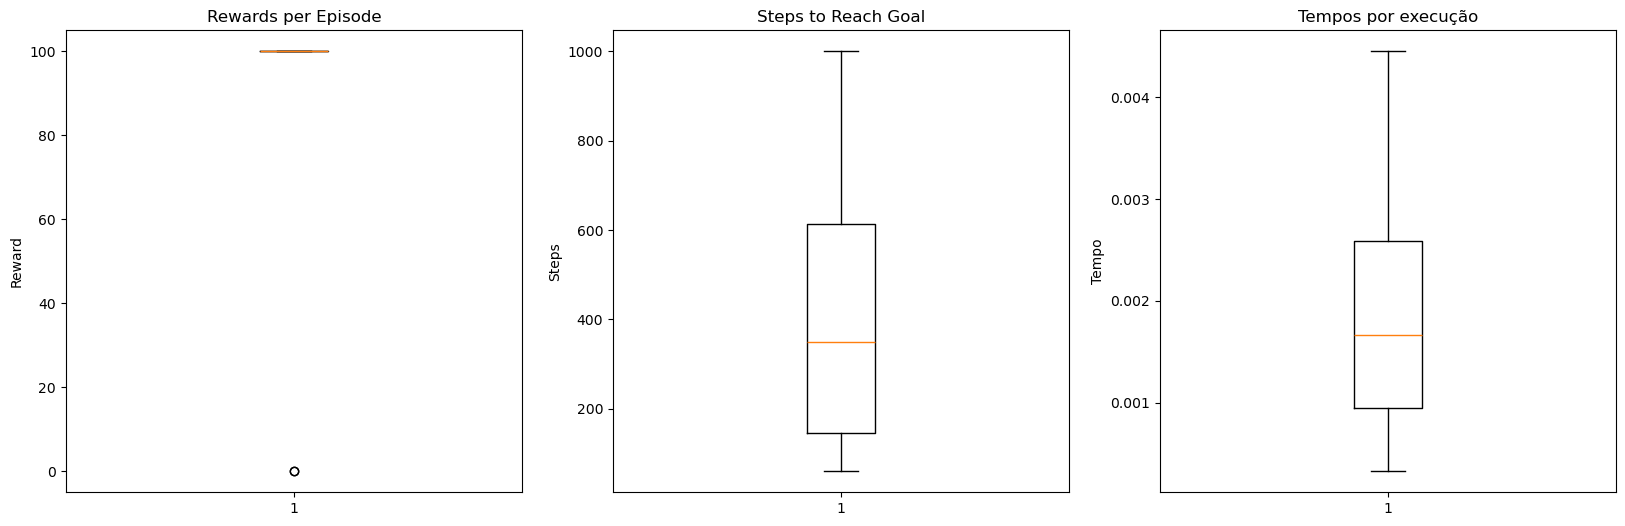

Average Reward per Episode: 93.33333333333333
Average Steps to Goal: 407.46666666666664
Standard Deviation of Steps: 289.16820172503213


In [45]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time  # Optional delay for visualizing matrix updates

class Environment:
    def __init__(self):
        # Define the grid size and initialize the field matrix
        self.field = np.zeros((10, 10), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces
        self.goal_state = [9, 9]  # Goal at bottom-right corner
        self.max_steps = 1000  # Maximum steps per episode

    def transition(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == "up" and state[0] > 0: # linhas
            state[0] -= 1 # linhas - 1
        elif action == "down" and state[0] <  self.field.shape[0] - 1: # linhas
            state[0] += 1 # linhas + 1
        elif action == "left" and state[1] > 0:
            state[1] -= 1 # colunas - 1
        elif action == "right" and state[1] < self.field.shape[1] - 1:
            state[1] += 1 # colunas + 1
        return state

    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent:
    def __init__(self, environment):
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = ["up", "down", "left", "right"]

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_episode(self):
        """Run an episode until goal is reached or max steps are exceeded."""
        inicio = time.time()
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            action = self.choose_random_action()
            new_state = self.env.transition(self.current_state, action)
            total_reward += self.env.reward(new_state)
            steps += 1
            

            # Print the matrix every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}")
                self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                print("Reached the goal!")
                break

        self.reset()
        fim = time.time()
        dif = fim - inicio
        return total_reward, steps, dif

# Run simulation for 30 episodes
def simulate(agent, num_episodes=30):
    rewards, steps_list, dif_list = [], [], []

    for _ in range(num_episodes):
        reward, steps, diferenca = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)
        dif_list.append(diferenca)

    print(f"Reward: {rewards}")
    print(f"Steps: {steps_list}")
    print(f"tempos: {dif_list}")

    return rewards, steps_list, dif_list


def plot_analyze(rewards, steps_list, diferenca):
    """Use to analyze results."""
    # Calculate statistics
    avg_reward = np.mean(rewards)
    avg_steps = np.mean(steps_list)
    std_steps = np.std(steps_list)
    avg_dif = np.mean(diferenca)

    # Plotting the results
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    ax[0].boxplot(rewards, vert=True)
    ax[0].set_title("Rewards per Episode")
    ax[0].set_ylabel("Reward")

    ax[1].boxplot(steps_list, vert=True)
    ax[1].set_title("Steps to Reach Goal")
    ax[1].set_ylabel("Steps")

    ax[2].boxplot(diferenca, vert=True)
    ax[2].set_title("Tempos por execução")
    ax[2].set_ylabel("Tempo")
    
    plt.show()

    print(f"Average Reward per Episode: {avg_reward}")
    print(f"Average Steps to Goal: {avg_steps}")
    print(f"Standard Deviation of Steps: {std_steps}")

# Initialize environment and agent
env = Environment()
agent = Agent(env)

# Run the simulation
rewards, steps_list, diferenca = simulate(agent)
plot_analyze(rewards, steps_list,diferenca)

# Ex 2

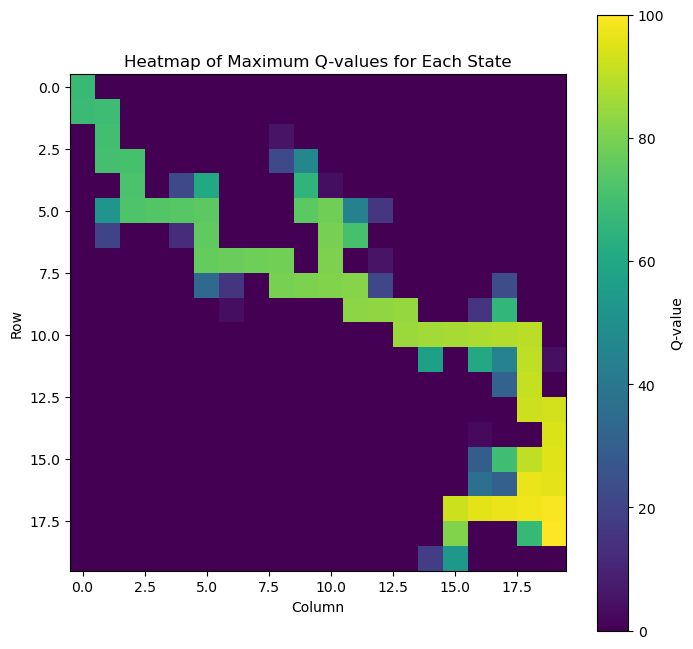

[[6.75729049e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.82554595e+01 6.89449086e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.96413218e+01 9.23110693e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.28185568e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.03447695e+01 7.10553227e+01 0.00000000e+00
  0.0

In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt

a = 0.7
y = 0.99
greed = 1 # if closer to 1, then it goes to the best option

class Environment2:
    def __init__(self, size=20): # default should be 10
        # Define the grid size and initialize the field matrix
        self.field = np.zeros((size, size), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces
        self.size = size

        self.goal_state = [size-1, size-1]  # Goal at bottom-right corner
        self.max_steps = size * 2000  # Maximum steps per episode

        # Print the field
        self.print_field()

    def add_walls(self):
        # Add the vertical walls
        self.field[1:, self.size-4] = 'W'  # Wall bottom up
        self.field[:-1, 3] = 'W'  # Wall from top to bottom

    #def add_walls(self):
        # Define the vertical walls using the dimensions of self.field
    #    self.field[:-1, self.field.shape[1] - 2] = 'W'  # Wall from top to bottom in the second column from the right
    #    self.field[1:, 1] = 'W'  # Wall from bottom up in the second column from the left


    def print_field(self):
        for row in self.field:
            print(' '.join(row))
        print()
    
    '''def transfake(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == 0 and state[0] > 0: # linhas
            return [state[0]-1,state[1]]
        elif action == 1 and state[0] < len(self.field[0]) - 1: # linhas
            return [state[0] +1,state[1]]
        elif action == 2 and state[1] > 0:
            return [state[0],state[1] -1]
        elif action == 3 and state[1] < len(self.field[0]) - 1:
            return [state[0] ,state[1] +1]
        return state'''

    def trans_with_walls(self, state, action, random_miss_prob=0):
        """State transition function with walls, boundary checks, and random miss probability."""
        new_state = state.copy()
        reward = 0  # Default reward

        # Randomly decide if the action should be a 'miss'
        if np.random.rand() < random_miss_prob:
            # Choose a random valid action instead
            action = np.random.choice([0, 1, 2, 3])

        # Determine the target state based on the (potentially missed) action
        if action == 0 and state[0] > 0:  # Up
            new_state = [state[0] - 1, state[1]]
        elif action == 1 and state[0] < len(self.field) - 1:  # Down
            new_state = [state[0] + 1, state[1]]
        elif action == 2 and state[1] > 0:  # Left
            new_state = [state[0], state[1] - 1]
        elif action == 3 and state[1] < len(self.field[0]) - 1:  # Right
            new_state = [state[0], state[1] + 1]
        
        # Check for walls or out-of-bounds attempts
        if self.field[new_state[0], new_state[1]] == 'W' or new_state == state:
            reward = -0.1  # Penalty for invalid move
            new_state = state  # Stay in the same position

        return new_state, reward


    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent2:
    def __init__(self, environment):
        self.q = np.zeros((environment.field.shape[1], environment.field.shape[0], 4))
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = [0,1,2,3]

    def reset_q(self): 
        self.q = np.zeros((self.env.field.shape[1], self.env.field.shape[0], 4))

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_random_walk_and_test(self, total_steps=20000, num_intervals=16, test_steps=1000, num_experiments=30):
        rewards_per_experiment = []
        interval_steps = total_steps // num_intervals

        for _ in range(num_experiments):
            interval_rewards = []
            self.reset()

            # Perform random walk with testing at intervals
            for _ in range(num_intervals):
                # Random walk with Q-table updates
                for _ in range(interval_steps):
                    action = self.choose_random_action()
                    new_state, walls_reward = self.env.trans_with_walls(self.current_state, action)
                    reward = walls_reward + self.env.reward(new_state)
                    
                    current_q = self.q[self.current_state[0], self.current_state[1], action]
                    next_max_q = np.max(self.q[new_state[0], new_state[1], :])
                    updated_q = (1 - a) * current_q + a * (reward + y * next_max_q)
                    self.q[self.current_state[0], self.current_state[1], action] = updated_q

                    self.current_state = new_state
                    if self.current_state == self.env.goal_state:
                        self.reset()

                # Testing phase without Q-table updates
                total_test_reward = 0
                self.reset()
                for _ in range(test_steps):
                    q_values = self.q[self.current_state[0], self.current_state[1]]

                    if np.all(q_values == q_values[0]):
                        best_action = self.choose_random_action()
                    else:
                        #action = self.choose_random_action()
                        best_action = np.argmax(q_values)

                    new_state, walls_reward = self.env.trans_with_walls(self.current_state, best_action)
                    total_test_reward += walls_reward + self.env.reward(new_state)
                    self.current_state = new_state

                    if self.current_state == self.env.goal_state:
                        self.reset()

                avg_test_reward = total_test_reward / test_steps
                interval_rewards.append(avg_test_reward)

            rewards_per_experiment.append(interval_rewards)

        return np.array(rewards_per_experiment)

    def run_episode(self, random_miss_prob=0):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state, walls_reward = self.env.trans_with_walls(self.current_state, action, random_miss_prob=random_miss_prob)
            total_reward += walls_reward
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q

            self.current_state = new_state

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                # print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

    def run_episode_increasing_greed(self, current_episode, num_episodes, start_iteration=0.3, start_greed=0.3, random_miss_prob=0):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0
        #greed = 0.3

        for i in range(self.env.max_steps):
            # Set greed to 0.3 for the first 30% of steps, then increase it based on current episode
            if (current_episode / num_episodes) < start_iteration:
                greed = start_greed
            else:
                greed = start_greed + (1-start_greed) * (current_episode / num_episodes)

            # print(f"current episode: {current_episode}, current greed: {greed} | ", end = '')

            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state, walls_reward = self.env.trans_with_walls(self.current_state, action, random_miss_prob=random_miss_prob)
            total_reward += walls_reward
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q


            self.current_state = new_state

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                # print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

# Run simulation for 30 episodes
def simulate2(agent, num_episodes=500, random_miss_prob=0):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode(random_miss_prob=random_miss_prob)
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    #print(f"Reward: {rewards}")
    #print(f"Steps: {steps_list}")
    #print(f"Q: {q_lista}")

    # print(np.mean(q_lista, axis=0))

    return rewards, steps_list, q_lista

def heat_matrix(q_table):
    """
    Generate a matrix where each cell contains the maximum Q-value of all actions for that state.
    """
    # Calculate the maximum Q-value for each state by taking the max across the actions axis (axis=2)
    heatmap_matrix = np.max(q_table, axis=2)
    return heatmap_matrix

def plot_heatmap(heatmap_matrix):
    plt.figure(figsize=(8, 8))
    plt.imshow(heatmap_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label="Q-value")
    plt.title("Heatmap of Maximum Q-values for Each State")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()


ambiente = Environment2()
agente = Agent2(ambiente)

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

print("2.b.)")

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()



Shape of rewards_per_experiment: (30, 16)
Interval points: [ 1250.  2500.  3750.  5000.  6250.  7500.  8750. 10000. 11250. 12500.
 13750. 15000. 16250. 17500. 18750. 20000.]


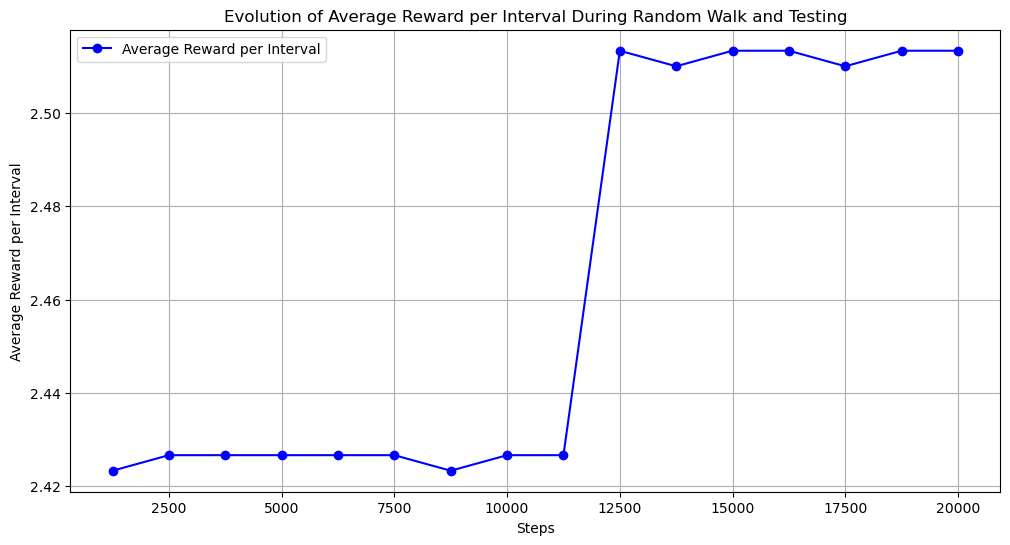

In [47]:
def plot_reward_evolution(rewards_per_experiment):
    print(f"Shape of rewards_per_experiment: {np.array(rewards_per_experiment).shape}")

    interval_points = np.linspace(1250, 20000, 16, endpoint=True)
    plt.figure(figsize=(12, 6))

    print(f"Interval points: {interval_points}")

    # Convert the transposed array into a list of arrays
    boxplot_data = [rewards_per_experiment[:, i] for i in range(rewards_per_experiment.shape[1])]

    # plt.boxplot(boxplot_data, positions=interval_points, widths=600, showfliers=False)
    plt.plot(interval_points, np.mean(rewards_per_experiment, axis=0), label="Average Reward per Interval", marker="o", color="b")
    plt.xlabel("Steps")
    plt.ylabel("Average Reward per Interval")
    plt.title("Evolution of Average Reward per Interval During Random Walk and Testing")
    plt.legend()
    plt.grid()
    plt.show()

agente.reset_q()


print("2.a.)")
rewards_per_experiment = agente.run_random_walk_and_test()
plot_reward_evolution(rewards_per_experiment)

agente.reset_q()


Greed at 0.5:


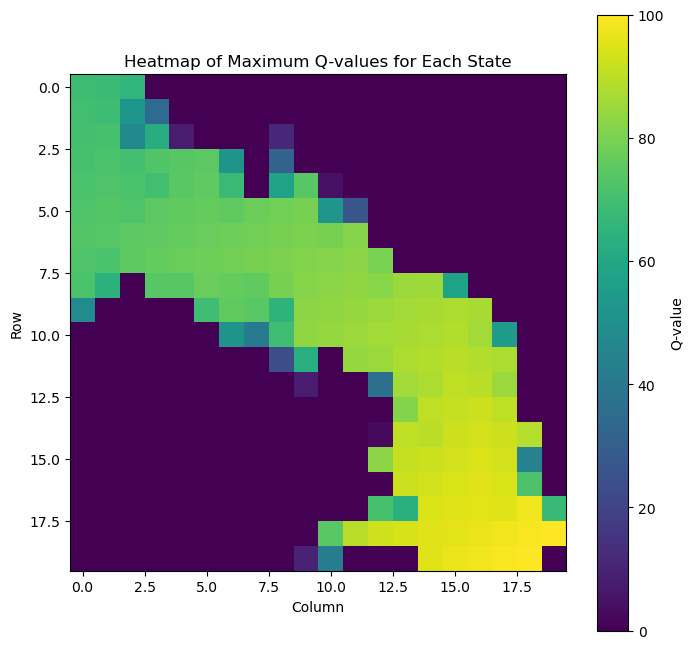

[[6.89449086e+01 6.82554595e+01 6.57453181e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.96413218e+01 6.89449086e+01 5.24329807e+01 3.50410684e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.03447695e+01 7.10034923e+01 4.78536125e+01 6.22962246e+01
  7.94035077e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.15714937e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.10553227e+01 7.17730533e+01 7.00323557e+01 7.30363590e+01
  7.3

In [48]:
greed = 0.8

print("Greed at 0.5:")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Greed at 0.1: (very random)


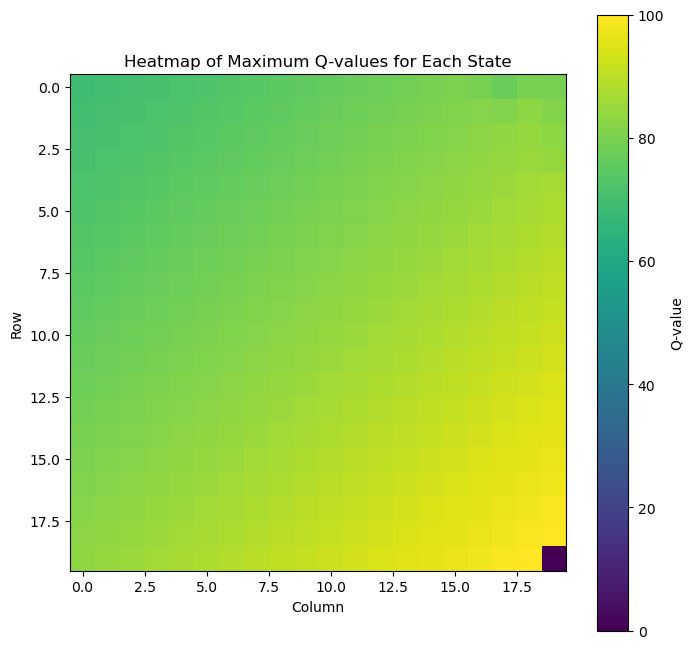

[[ 68.94490859  69.6413218   70.3447695   71.05532273  71.77305326
   72.4980336   73.23033697  73.97003734  74.71720943  75.47189214
   76.2342714   77.00430641  77.78213427  78.56747993  79.36029854
   80.15745731  79.37659545  77.26438798  79.80493112  79.55048217]
 [ 69.6413218   70.3447695   71.05532273  71.77305326  72.4980336
   73.23033697  73.97003734  74.71720943  75.47192872  76.23427143
   77.00431458  77.78213474  78.56781394  79.36141519  80.16291957
   80.97135512  81.75464116  80.94681098  83.01889258  81.53993969]
 [ 70.3447695   71.05532273  71.77305326  72.4980336   73.23033697
   73.97003734  74.71720943  75.47192872  76.23427143  77.00431458
   77.78213594  78.56781408  79.36142835  80.16305884  80.97278368
   81.79068387  82.61620581  83.38716118  84.20508561  82.88649867]
 [ 71.05532273  71.77305326  72.4980336   73.23033697  73.97003734
   74.71720943  75.47192872  76.23427143  77.00431458  77.78213594
   78.56781408  79.36142836  80.16305895  80.97278682  81.79

In [49]:
agente.reset_q()
greed = 0.1

print("Greed at 0.1: (very random)")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Increasing from 30\% of the tests


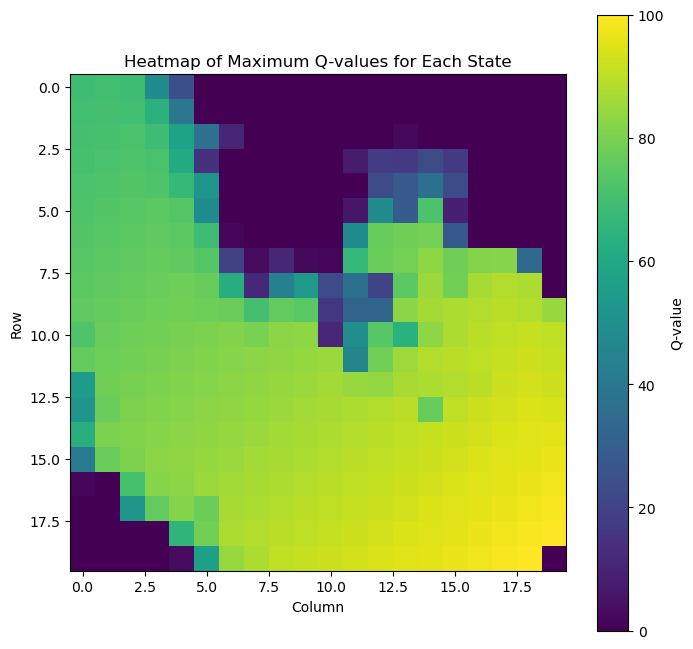

[[6.89449086e+01 6.96413218e+01 6.88519433e+01 4.86282451e+01
  2.45519972e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.96413218e+01 7.03447695e+01 6.96356718e+01 6.42370567e+01
  3.94603218e+01 2.34460161e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.03447695e+01 7.10553227e+01 7.16953952e+01 6.91187868e+01
  5.78917344e+01 3.72339118e+01 1.01595094e+01 1.24985301e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.17489569e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.10553227e+01 7.17730533e+01 7.24979669e+01 7.12093455e+01
  6.1

In [50]:
agente.reset_q()
greed = 0.3

# Run simulation for 30 episodes
def simulate_increasing_greed(agent, start_iteration=0.3, start_greed=0.3, num_episodes=500, random_miss_prob=0):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode_increasing_greed(current_episode, num_episodes, start_iteration=start_iteration, start_greed=start_greed, random_miss_prob=random_miss_prob)
        #reward, steps, q = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    return rewards, steps_list, q_lista  # Ensure the function returns the values

# greed = 0.1

print("Increasing from 30\% of the tests")

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.3)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

# Ex 4

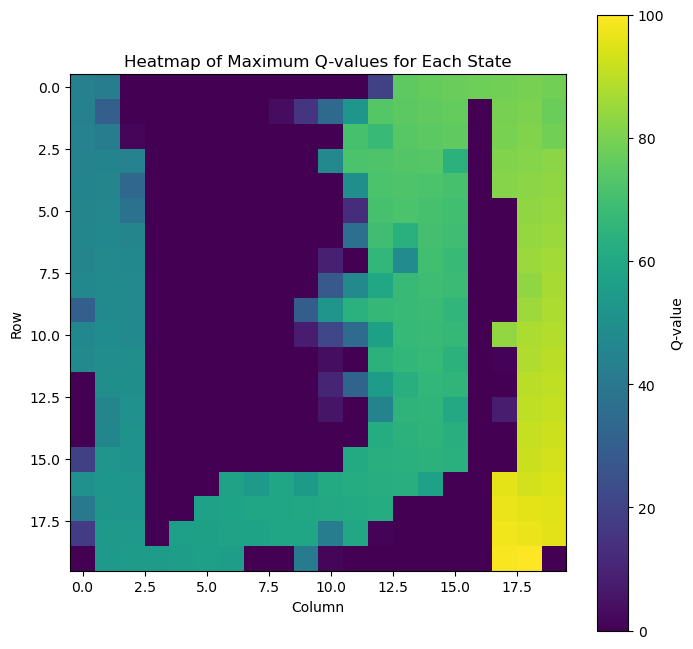

[[4.34231327e+01 4.18281848e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.30222811e-02 0.00000000e+00 0.00000000e+00
  1.94225260e+01 7.52448742e+01 7.62342677e+01 7.70043146e+01
  7.77821359e+01 7.85678141e+01 7.93614284e+01 7.85677804e+01]
 [4.38617502e+01 3.03961925e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.33051290e+00 1.51296420e+01 3.43464122e+01 5.27233725e+01
  7.37592349e+01 7.47172094e+01 7.54719287e+01 7.62342714e+01
  0.00000000e+00 7.93035739e+01 8.01630590e+01 7.74735310e+01]
 [4.43047982e+01 4.21063899e+01 1.83286264e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 7.09052035e+01
  6.75225547e+01 7.39700373e+01 7.47172044e+01 7.54681686e+01
  0.00000000e+00 8.00044301e+01 8.09727868e+01 7.87630409e+01]
 [4.47523214e+01 4.52043650e+01 4.43288318e+01 0.00000000e+00
  0.0

In [51]:
agente.reset_q()

agente.env.add_walls()

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.91)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

# Ex 5

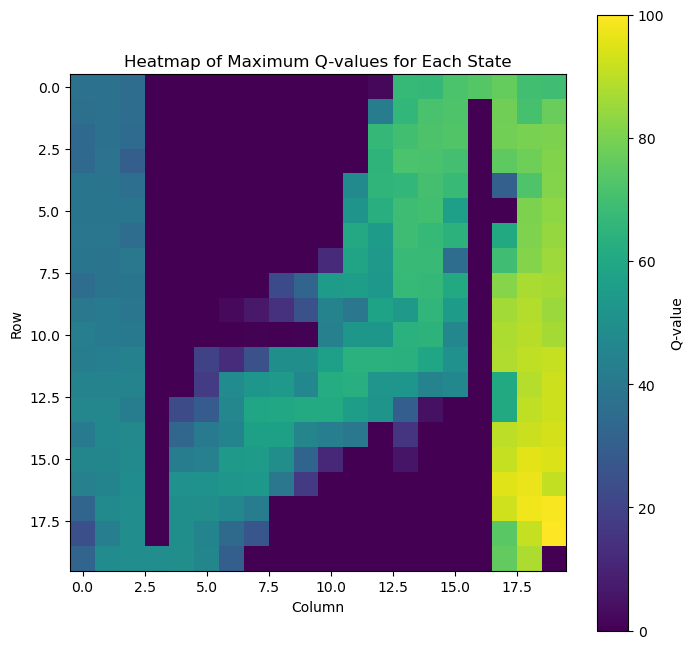

[[3.76894925e+01 3.75948321e+01 3.56550430e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.05495246e+00 6.71311638e+01 6.64399670e+01 7.18509913e+01
  7.36772636e+01 7.64157186e+01 6.95438930e+01 6.94503827e+01]
 [3.69714119e+01 3.75384184e+01 3.57347220e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.36759675e-04
  4.19393568e+01 6.63877740e+01 7.11442864e+01 7.22724394e+01
  0.00000000e+00 7.82941473e+01 7.09994448e+01 7.69902581e+01]
 [3.40098059e+01 3.76893634e+01 3.49560061e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.23294925e-04
  6.65708558e+01 6.95362831e+01 7.18983467e+01 7.27793543e+01
  0.00000000e+00 7.89009340e+01 7.96955121e+01 8.04160601e+01]
 [3.43729375e+01 3.80385188e+01 3.02722952e+01 0.00000000e+00
  0.0

In [52]:
agente.reset_q()

# agente.env.add_walls()

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.91, random_miss_prob=0.05)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()